# Convert CRY files to RGB

Convert cry files to rgb arrays that we can use to create and extract images.

In [146]:
import cry_rgb as cry
from PIL import Image, ImageColor
import numpy as np
from ascii_magic import AsciiArt

def getPixels(cry_pixels,width=2):
    rgb_pixels = []
    for i in range(0, len(cry_pixels),2):
        t = cry_pixels[i:i+2]
        #print(i,t,int.from_bytes(t,'little'))
        rgb = cry.cry_to_rgb(int.from_bytes(t,'big'))
        rgb_pixels += [rgb]
    pad_len = width - (len(rgb_pixels) % width)
    rgb_pixels += [(0,0,0)] * pad_len
    pixels = np.array(rgb_pixels).astype(np.uint8)
    pixels.shape = (-1,width,3)
    return pixels

## Extract the VLM Logo

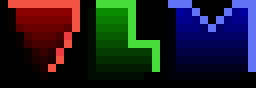

In [6]:
width = 32
scale = 8

file_name = '../src/vlm/images/vlmlogo.cry'
cry_pixels = open(file_name,'rb').read()
pixels = getPixels(cry_pixels,width)

img = Image.fromarray(pixels,mode='RGB')
img = img.resize((img.width * scale, img.height * scale), Image.NEAREST)
img

## Character set in vlmlogo2.cry

;                     
;                     
;     'VX!            
;     `t7Jpy          
;        l3ynuv       
;          .qd#*s`    
;             nQM,    
;           ^=n@k:    
;        .-^AKL'_     
;        oUk>":       
;     'Eb#c%          
;     `!1\    *gp_    
;           uJJJn-    
;        \1amS*       
;     .i%#bE`         
;     :BQn            
;     :UBn'_          
;      ^^n@k:         
;        ^icGk1       
;           *?J4S'    
;     -TCl    vu7-    
;     ,NQ#            
;     :DQn            
;     :DQn            
;     :DQn            
;     :KRu            
;     .|),            
;                     
;      36s            
;   vzjy3#ze-         
;   #QN- nQN,         
;   TQB: TQB:         
;   7@k: 7@k:         
;   `'_  `'_          
;                     
;                     
;                     
;                     
;   <]I`   `I]<       
;   TQW'   'WQT       
; ""yQB)""")BQy"""":  
; KKWQ0HKKKH0QWKKKKz  
; ==wQD\===\DQw===='  
;   LQH`   

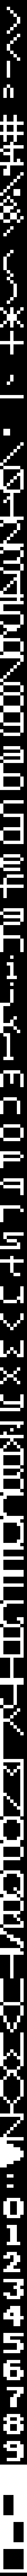

In [148]:
def get1BitPixels(cry_pixels,width=2):
    rgb_pixels = []
    for b in cry_pixels:
        for m in [128,64,32,16,8,4,2,1]:
            rgb_pixels += [(255,255,255) if (b & m) else (0,0,0)]
    pad_len = width - (len(rgb_pixels) % width)
    rgb_pixels += [(0,0,0)] * pad_len
    pixels = np.array(rgb_pixels).astype(np.uint8)
    pixels.shape = (-1,width,3)
    return pixels

width = 8
scale = 8

file_name = '../src/vlm/images/vlmlogo2.cry'
cry_pixels = open(file_name,'rb').read()[480:]
pixels = get1BitPixels(cry_pixels,width)

img = Image.fromarray(pixels,mode='RGB')
img = img.resize((img.width * scale, img.height * scale), Image.NEAREST)

my_art = AsciiArt.from_pillow_image(img)
ascii_image = my_art.to_ascii(columns=20, monochrome=True)
print(''.join(["; " + l +"\n" for l in ascii_image.splitlines()]))

img


In [118]:
224/14

16.0

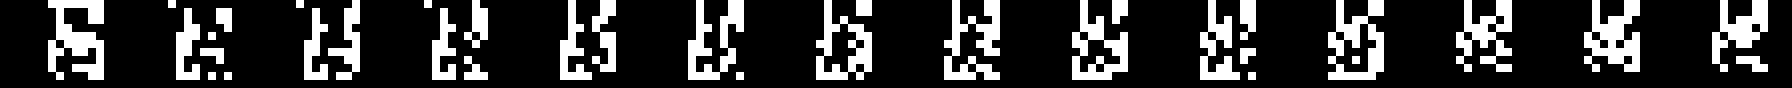

In [140]:
def get2BitPixels(cry_pixels,width=2):
    rgb_pixels = []
    for b in cry_pixels:
        for m in [128,64,32,16,8,4,2,1]:
            rgb_pixels += [(255,255,255) if (b & m) else (0,0,0)]
    pad_len = width - (len(rgb_pixels) % width)
    rgb_pixels += [(0,0,0)] * pad_len
    pixels = np.array(rgb_pixels).astype(np.uint8)
    pixels.shape = (-1,width,3)
    return pixels

width = 224
scale = 8

file_name = '../src/vlm/images/vlmlogo2.cry'
cry_pixels = open(file_name,'rb').read()[200:480]
pixels = get1BitPixels(cry_pixels,width)

img = Image.fromarray(pixels,mode='RGB')
img = img.resize((img.width * scale, img.height * scale), Image.NEAREST)
img

In [220]:
def getDivisors(n):
    for i in range(1,880):
        if n % i == 0:
            print(i)


## Extract the Jaguar logo

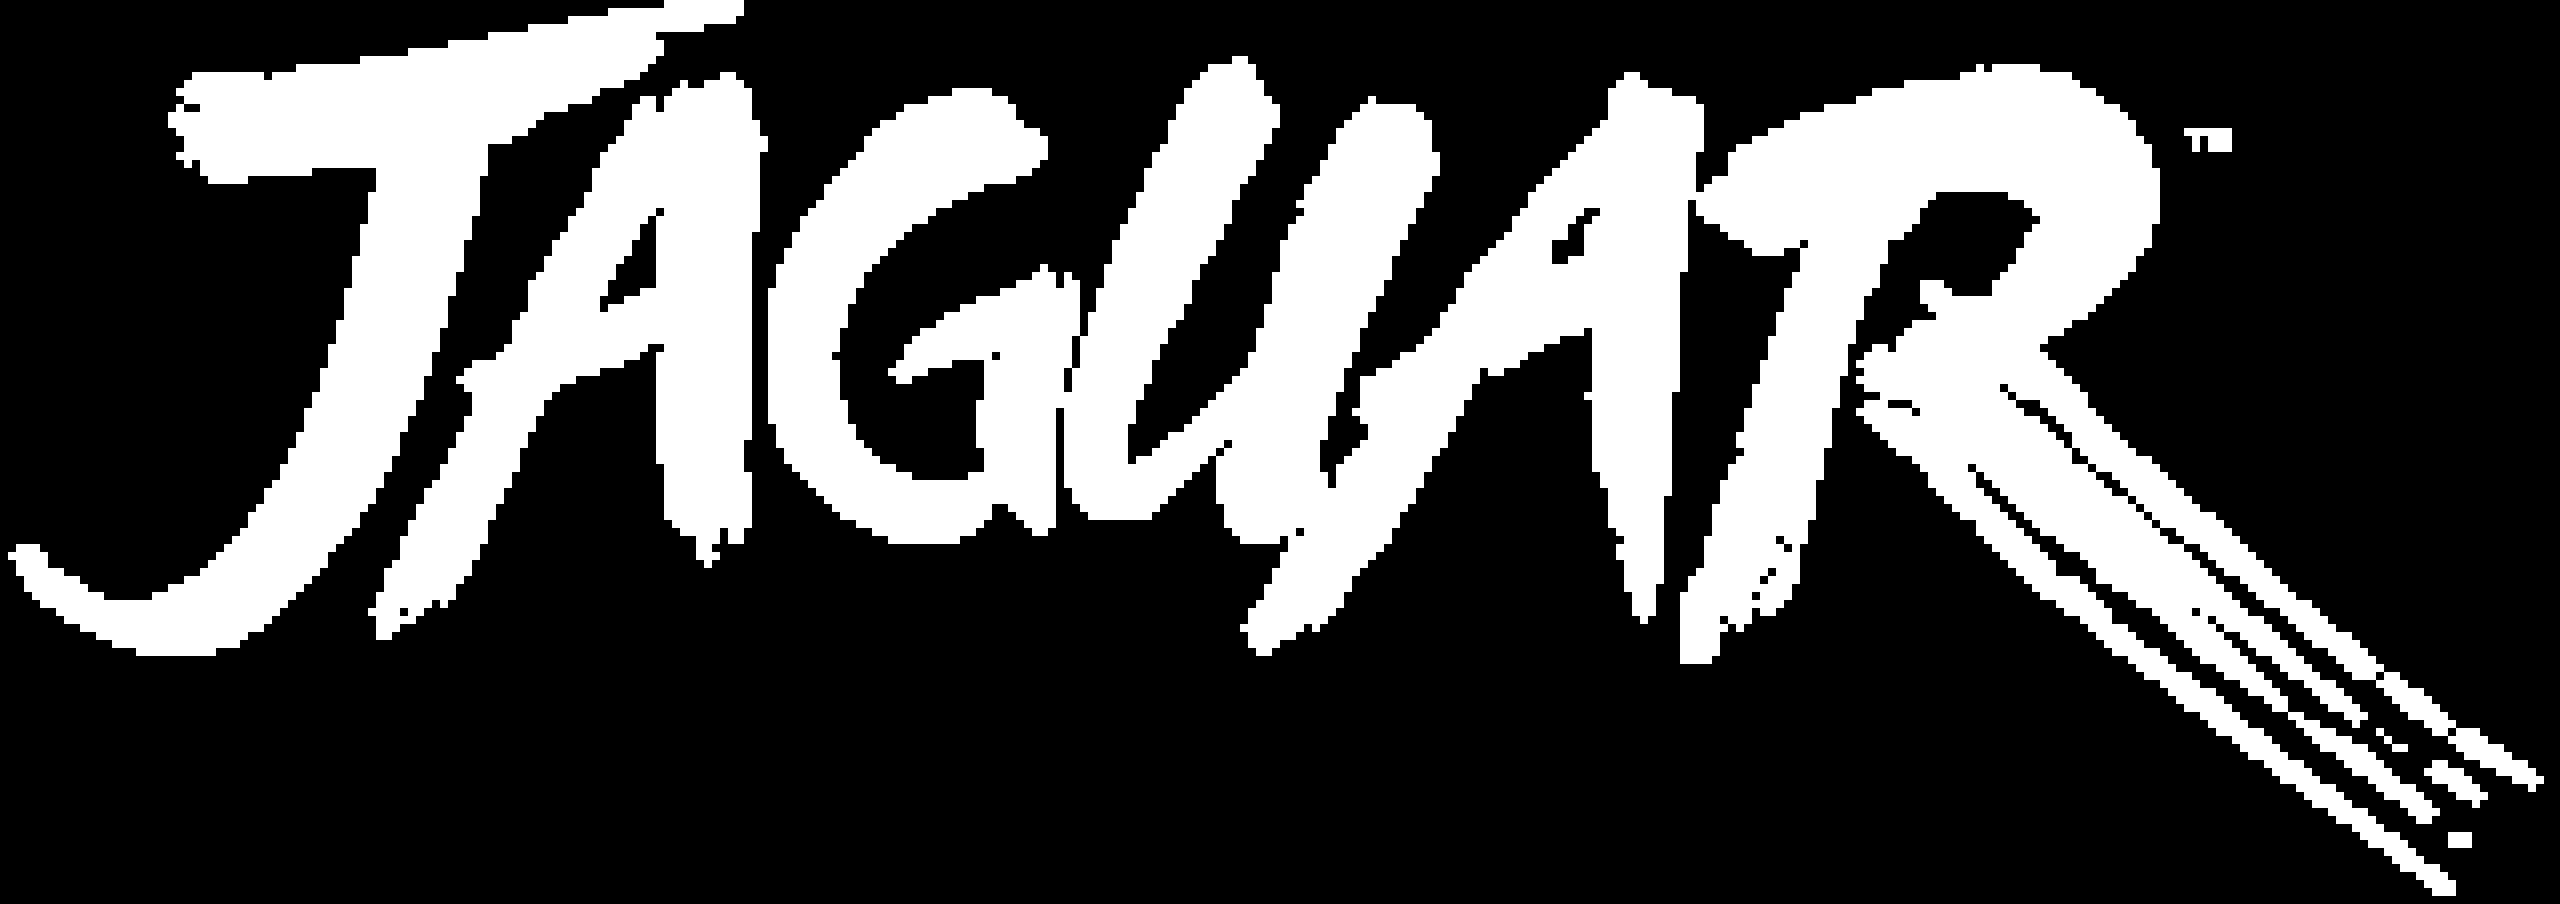

In [3]:

width = 320
scale = 8
file_name = '../src/vlm/images/jaglogo.cry'
# The 1st 4 bytes are header info
cry_pixels = open(file_name,'rb').read()[4:]
pixels = get1BitPixels(cry_pixels,width)
img = Image.fromarray(pixels,mode='RGB')
img = img.resize((img.width * scale, img.height * scale), Image.NEAREST)
img

;     v77y6gP6Tu5pgw.^IeT?: 'tSL_*t) `)!yu>s1Tf7oq5#)^,           }5njJGK5aLXEG5.\1T71^ :ag!;eyl ;)eSJl1T223yqdyc^,       
;     .':%O0SIJm6OQGgOo{eJ5nbGjab@hoLF28Qy)JMZ6gw8&f>              _.vZB3}udSGQE6K1]!qm#Yg]e8&SnJ53PQ#|5QGupdObJ<         
; +";=|{fXm#5Fs:`*4o*L!*[Cwf5%lXBgga/_ {@*#Um:cn6XYhJes=_.    ="/;>!wg3oy6%_ vgtvo??}T#ujv*ZDS3a+. ib{#8f_"afSdh3n!\'.    
; _+|%lr<_ /=                  +\^      :"%^     `/){eTt[elc": '^,">|` ;:                  ,\,       |),     .'/%o#11ol%"_
;                 ^fyyy#_  _oy2[=fyyy>.zffyL\         ]Fq4bI:_offfye   _Iyn)eyyyy;'}TLzyy27+    =Jyy32t             '/||-`
;                 yQQQQu  +XQQErTQQQQl2QQQy"   =)[5fs{RQQBl  rQQQQK)  [&QQ0UQQQQ8: `/c8QQU< 1r<t&QQQD3"                   
;                cNQQQE``\GQQQ@D8MQQQ?KQ0J  vwG@NQQQS$QQP>  =&QQQY^`iqQQQWkSdQQQE   -XQQ$c>w@Q0QQW2r,                     
;               )$QQQ&=)bWQ@2e{\lQQQQ?@QQ1 ,j[%)8QQ@bQQX: ^eAQQQA{m8QQD7I". tQQQ6  .FQQ0t5BNQQQM$&V}.                     
;              _

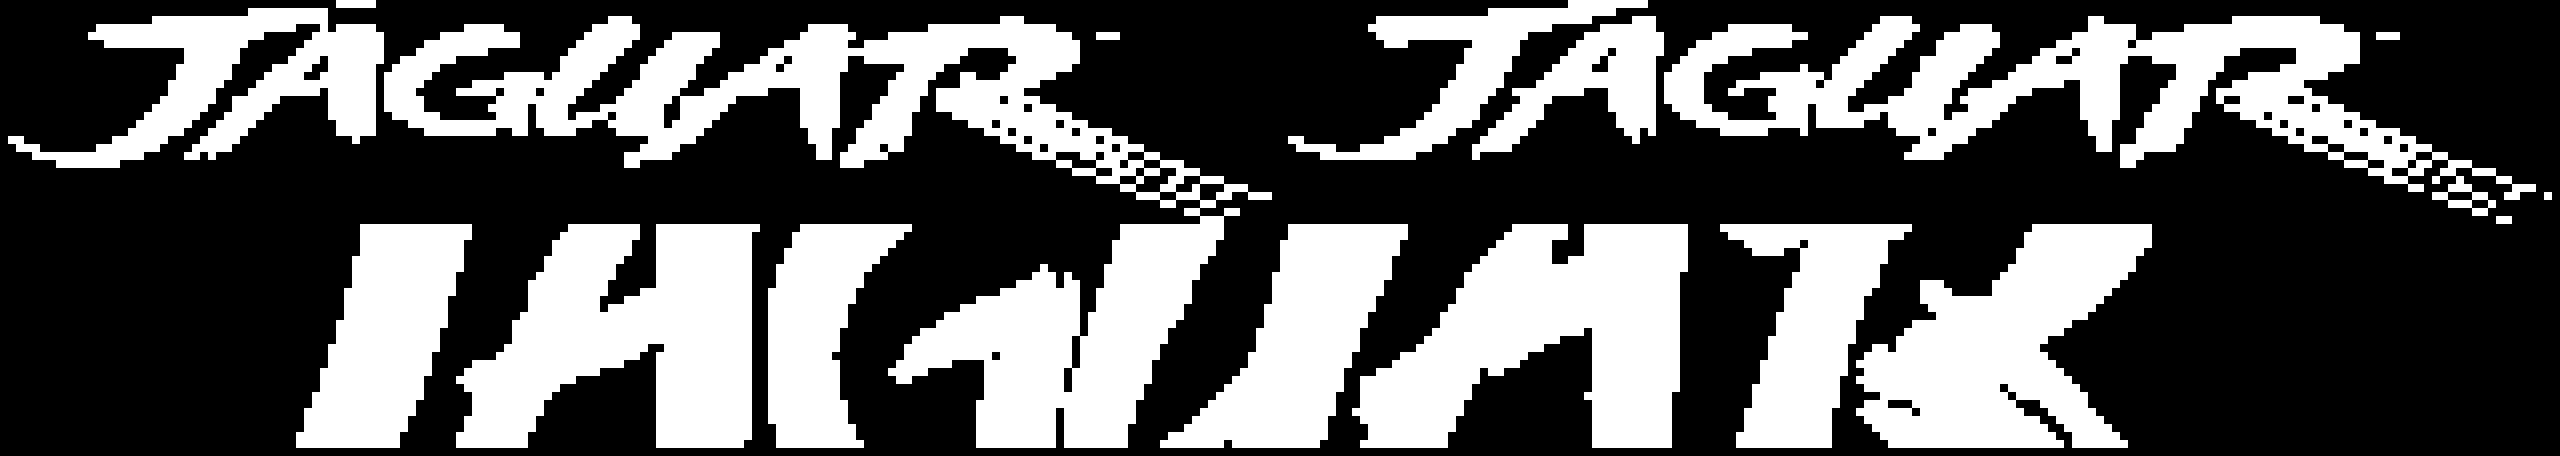

In [151]:
width = 320
scale = 8
file_name = '../src/vlm/images/jlogo2.cry'
cry_pixels = open(file_name,'rb').read()[4:]

pixels = get1BitPixels(cry_pixels,width)
img = Image.fromarray(pixels,mode='RGB')
img = img.resize((img.width * scale, img.height * scale), Image.NEAREST)

my_art = AsciiArt.from_pillow_image(img)
ascii_image = my_art.to_ascii(columns=120, monochrome=True)
print(''.join(["; " + l +"\n" for l in ascii_image.splitlines()]))

img

In [384]:
3440/40

86.0

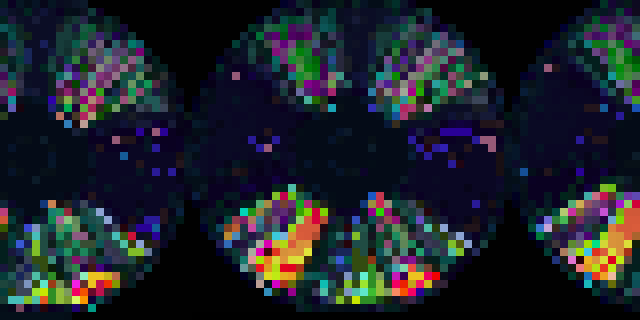

In [5]:
width = 80
scale = 8

file_name = '../src/images/cd1.cry'
cry_pixels = open(file_name,'rb').read()[640:]
pixels = getPixels(cry_pixels,width)

img = Image.fromarray(pixels,mode='RGB')
img = img.resize((img.width * scale, img.height * scale), Image.NEAREST)
img

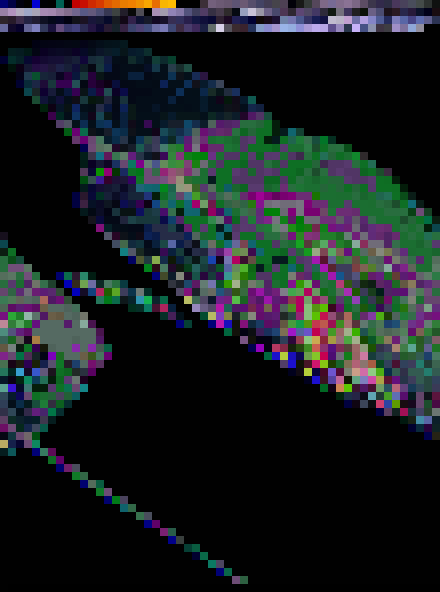

In [428]:
width = 55
scale = 8

file_name = '../src/images/cdback.cry'
cry_pixels = open(file_name,'rb').read()
pixels = getPixels(cry_pixels,width)

img = Image.fromarray(pixels,mode='RGB')
img = img.resize((img.width * scale, img.height * scale), Image.NEAREST)
img

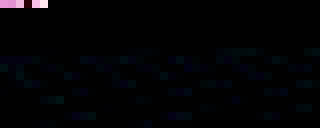

In [436]:
width = 40
scale = 8

file_name = '../src/images/quest.cry'
cry_pixels = open(file_name,'rb').read()[48:]
pixels = getPixels(cry_pixels,width)

img = Image.fromarray(pixels,mode='RGB')
img = img.resize((img.width * scale, img.height * scale), Image.NEAREST)
img

In [142]:
from ascii_magic import AsciiArt
from PIL import Image
width = int(320/10)
pixels = getPixels('../src/vlm/images/vlmlogo.cry')
img = Image.fromarray(pixels,mode='RGB')
img = img.resize((img.width * 8, img.height * 8), Image.NEAREST)
my_art = AsciiArt.from_pillow_image(img)
ascii_image = my_art.to_ascii(columns=120, monochrome=True)
print(''.join(["; " + l +"\n" for l in ascii_image.splitlines()]))


TypeError: cannot convert 'str' object to bytes

In [149]:

width = 320
scale = 8
file_name = '../src/vlm/images/jaglogo.cry'
# The 1st 4 bytes are header info
cry_pixels = open(file_name,'rb').read()[4:]
pixels = get1BitPixels(cry_pixels,width)
img = Image.fromarray(pixels,mode='RGB')
img = img.resize((img.width * scale, img.height * scale), Image.NEAREST)
my_art = AsciiArt.from_pillow_image(img)
ascii_image = my_art.to_ascii(columns=90, monochrome=True)
print(''.join(["; " + l +"\n" for l in ascii_image.splitlines()]))


;        ``.:;+\x}a#F4A@Au1{.               '"                         _;:.                 
;      `CA&AKWMM0QQQWX2ty#mP!   -%oyp1;    1&Wy. ia!:     1G5a  ^%]n6EP8H@Y2*..^'           
;      .tZYE4F5DQQM}= :hQQQQG  }ZQQQKYa   L0QH!`nRQQe  .IERQQG1bWQQQQQBHB0QQQm-)/           
;             )WQQ2  xk02UQQy^dQQXa|.    TQQU) yQQQy- i4$qNQQnfA8KQQb?-`+gQQQd`             
;            .XQQU: [MQgTBQQzgQH{ .i1wX2eQQb+ }QQQC ;6QQNKQQN| .cKQ4'l#aX0BZa-              
;            jQQ0{vw0MYgC$QQJKQ# %5FPQQODQg- x$QQFcC$QP2?sBQB^ ,OQ$oqDQQRHL`                
;           ?MQQe VQb\. .$QQaPQk|-  wQNYQY\1dNQQhxMQBI   ^NQb. 6QQ7rYWQ0WZGSr_              
;         `jMQWa;hQZ=    hQQ?=J@BPF5G8NfH8Zf]RQ0X&Qb\    `gQg eRQ$: '{GAAWWKOGL).           
; rj\`  ^!bQ0S>"&QG^     =To"  :vejo<_%`;+,  sTHQBC'      )ML|WQBt    .x2gSkBM@P5{'         
; :12FmPH0@Fi  55?_                          ,EY6\         aiA&f1-       <[yf3Y8dgyzi_      
;    '|i>|_    `                             `|.             l^       

In [272]:
0x34d8 - 0x188a

7246

In [271]:
0x44b6 - 0x34d8

4062

In [274]:
1024*6

6144

In [273]:
0x57aa - 0x44b6

4852

In [265]:
from ascii_magic import AsciiArt
from PIL import Image

img = Image.open('6.png','r')
img = img.resize((img.width * 8, img.height * 8), Image.NEAREST)
my_art = AsciiArt.from_pillow_image(img)
ascii_image = my_art.to_ascii(columns=50, monochrome=True)
print(''.join(["; " + l +"\n" for l in ascii_image.splitlines()]))


;                                                   
;                                                   
;        ....................................-`     
;       .,;;;;;;;;;;;;;;;;;;;;;;;;,,,,+v1tT#TFc     
;       .,;;;;;;;;;;;;;;;;;;;;;;;/%[7f5worr)|+      
;       .,;;;;;;;;;;;;;;;;;;;;i]25we*)=;;;;;;:      
;       .,;;;;;;;;;;;;;;;;;ce2F7r^;;;;;;;;;;;:      
;       .,;;;;;;;;;;;;;=vjFp1%^;;;;;;;;;;;;;;:      
;       .,;;;;;;;;;;;%LSf1);;;;;;;;;;;;;;;;;;:      
;       .,;;;;;;;;/[CSt);;;;;;;;;;;;;;;;;;;;;:      
;       .,;;;;;+?wq#r=;;;;;;;;;;;;;;;;;;;;;;;:      
;       .,;;"!y5yl/;;;;;;;;;;;;;;;;;;;;;;;;;;:      
;       .,iuhus=;;;;;;;;;;;;;;;;;;;;;;;;;;;;;:      
;       'wSt\;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;:      
;       `)^;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;:      
;       .,;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;:      
;       .,;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;:      
;       .,;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;:      
;       .;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;,